"Generalized Estimating Equations estimate generalized linear models for panel, cluster or repeated measures data when the observations are possibly correlated withing a cluster but uncorrelated across clusters. It supports estimation of the same one-parameter exponential families as Generalized Linear models (GLM)."

In [6]:
import ssl

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
data = sm.datasets.get_rdataset('epil', package='MASS').data
data.head()

,y,trt,base,age,V4,subject,period,lbase,lage
0,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,3,placebo,11,30,0,2,1,-0.756354,0.081414


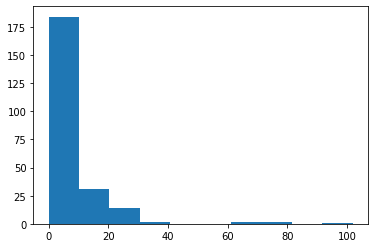

In [8]:
plt.hist(data.y);

In [11]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Exchangeable()

In [13]:
mod = smf.gee(
    'y ~ age + trt + base', 'subject', data, cov_struct=ind, family=fam)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Tue, 03 Aug 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         07:05:03
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112      -0.134       1.280
trt[T.progabide]    -0.1519      0.171     -0.888      0.375      -0.487       0.183
age                  0.0223      0.011      1.960      0.050    2.11e-06       0.045
base                 0.0226      0.001     18.451      0.000       0.020       0.025
==============================================================================
Skew:                          3.7823   Kurtosis:                      28.6672
Centered skew:                 2.7597   Centered kurtosis:             21.9865
==============================================================================
"""